In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model

%matplotlib inline

In [132]:
infile_old = '../data/BEA-RegionalIncomeByIndustry/CA5_1969_2000_MSA.csv'
infile = '../data/BEA-RegionalIncomeByIndustry/CA5N_2001_2013_MSA.csv'

df_old = pd.read_csv(infile_old)
df = pd.read_csv(infile)

df_old


,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,10,...,Personal income,395971,443561,474234,...,2376433,2538036,2663665,2722081,2918059,3109606,3329032,3490073,3639311,3741391
1,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,20,...,Population (persons) 2/,125138,122505,124841,...,147400,149917,152909,153779,156097,156351,157405,158264,159755,160288
2,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,30,...,Per capita personal income (dollars),3164,3621,3799,...,16122,16930,17420,17701,18694,19889,21149,22052,22781,23342
3,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,35,...,Earnings by place of work,314729,345979,368356,...,1640392,1759145,1834506,1895221,1995628,2131048,2326369,2432863,2579609,2598895
4,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,36,...,less: Contributions for government social in...,18303,19934,22303,...,168262,176727,184213,193361,203789,214107,227052,232301,240171,244306
5,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,37,...,Employee and self-employed contributions f...,9557,10240,11245,...,87427,91460,95847,101582,108123,113405,120785,123957,128823,129272
6,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,38,...,Employer contributions for government soci...,8746,9694,11058,...,80835,85267,88366,91779,95666,100702,106267,108344,111348,115034
7,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,42,...,plus: Adjustment for residence 4/,1495,1863,2003,...,5066,6192,6245,4630,3561,3165,4426,6403,7632,10171
8,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,45,...,equals: Net earnings by place of residence,297921,327908,348056,...,1477196,1588610,1656538,1706490,1795400,1920106,2103743,2206965,2347070,2364760
9,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,46,...,"plus: Dividends, interest, and rent 5/",61986,73938,78915,...,542650,542405,579228,557362,624395,657686,668241,720342,709218,772092


In [3]:
compareinfile = '../data/cleaned_data/regional_income_details_01-13.csv'

comparedf = pd.read_csv(compareinfile)

comparedf.drop('Unnamed: 0', axis=1, inplace=True)

comparedf

,line_id,line_desc,GeoFips,GeoName,CL_UNIT,UNIT_MULT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10,[CA5N] Personal income,10180,"Abilene, TX (Metropolitan Statistical Area)",thousands of dollars,3,3826121,3957936,4181505,4363728,4588171,4863397,5211004,5811434,5465772,5685546,6111898,6546641,6743442
1,10,[CA5N] Personal income,10420,"Akron, OH (Metropolitan Statistical Area)",thousands of dollars,3,20950429,21315035,22169663,22995085,23893569,25196505,26324506,26969414,26260437,26761719,28337002,29606464,30153560
2,10,[CA5N] Personal income,10500,"Albany, GA (Metropolitan Statistical Area)",thousands of dollars,3,3741744,3858145,4002073,4119900,4271892,4394788,4595837,4767476,4735401,4825885,5195453,5279385,5317564
3,10,[CA5N] Personal income,10540,"Albany, OR (Metropolitan Statistical Area)",thousands of dollars,3,2536579,2581851,2640428,2791265,2882484,3098406,3264599,3383329,3367677,3406222,3533978,3678060,3739110
4,10,[CA5N] Personal income,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",thousands of dollars,3,27850424,27873102,29204625,30886431,32350939,34231376,35908682,37679534,38153957,39524410,40874198,42740725,43626120
5,10,[CA5N] Personal income,10740,"Albuquerque, NM (Metropolitan Statistical Area)",thousands of dollars,3,21530144,22097811,22717760,23876115,25563674,27559229,28949391,30181604,29926084,30387940,31832781,32784577,32759375
6,10,[CA5N] Personal income,10780,"Alexandria, LA (Metropolitan Statistical Area)",thousands of dollars,3,3676855,3802040,3881985,4182037,4544138,4840263,5130556,5571406,5557503,5562930,5564112,5888429,5962572
7,10,[CA5N] Personal income,10900,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",thousands of dollars,3,23701021,24423010,25316995,26332077,27482828,29373665,31254008,32278321,31879360,32608606,34232344,35624976,36238500
8,10,[CA5N] Personal income,11020,"Altoona, PA (Metropolitan Statistical Area)",thousands of dollars,3,3255197,3326750,3438173,3588078,3725236,3876806,4092447,4200587,4244604,4358607,4597894,4758635,4821242
9,10,[CA5N] Personal income,11100,"Amarillo, TX (Metropolitan Statistical Area)",thousands of dollars,3,5897163,6025140,6348616,6625023,7129790,7644371,8110079,8882025,8584786,9022207,9616582,10123437,10327233


In [134]:
#look at personal income per capita
manufacturing_df = df[df['LineCode']==500]
full_df = manufacturing_df.copy()

manufacturing_df_old = df_old[df_old['LineCode']==400]
full_df_old = manufacturing_df_old.copy()

manufacturing_df_old

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
35,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,30607,31485,33877,...,168086,185028,172883,180286,196244,235405,259446,275008,281458,256299
148,10420,"Akron, OH (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,1060286,1055453,1064668,...,2694379,2814186,2931552,3066992,3181685,3210759,3261081,3452201,3525160,3550144
261,10500,"Albany, GA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,55560,62238,70818,...,334435E,344168,367097,397446,403805,426007,445291,458972,446298,464784
374,10540,"Albany, OR (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,88042,93295,104284,...,387043,413382,425603,465909,484734,522609,571677,550060,531039,519179
487,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",NaN,CA5,400,D,Manufacturing,607201,635447,676356,...,1839149,1950834,1962203,1946153,1859729,1823878,1883775,1894562,1942989,2063389
600,10740,"Albuquerque, NM (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,73066,79484,89025,...,839612,869116,964481,1111113,1174515,1229029,1365433,(D),(D),(D)
713,10780,"Alexandria, LA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,32472,33824,34014,...,147687,160447,175372,174055,178132,181415,178187,178220,199892,207283
826,10900,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",NaN,CA5,400,D,Manufacturing,956379,996610,1003265,...,2851903,3097339,3161118,3248094,3343038,3210122,3359848,3379788,3540093,3675932
939,11020,"Altoona, PA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,114165,117768,116559,...,290366,304083,324314,344225,351646,356851,373991,385914,417885,430935
1052,11100,"Amarillo, TX (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,61112E,67301E,75993E,...,353056E,370865E,398580E,431836E,458416E,476796,471859,(D),(D),(D)


In [147]:
# clean the data columns
import re

data_df = manufacturing_df[[str(x) for x in range(2001,2014)]]
data_df_old = manufacturing_df_old[[str(x) for x in range(1969,2001)]]

print data_df_old.head(3)

def clean_data_entry(x):
    m = re.match("\d+",x)
    if m:
        return float(m.group())
    else:
        return np.nan
        
data_df = data_df.applymap(clean_data_entry)
data_df_old = data_df_old.applymap(clean_data_entry)

print data_df_old.head(3)

        1969     1970     1971     1972     1973     1974     1975     1976  \
35     30607    31485    33877    41015    49523    62325    67428    66305   
148  1060286  1055453  1064668  1161319  1269333  1356121  1302663  1349946   
261    55560    62238    70818    86115   103444   114870   119231   133948   

        1977     1978   ...        1991     1992     1993     1994     1995  \
35     68129    74058   ...      168086   185028   172883   180286   196244   
148  1583276  1723508   ...     2694379  2814186  2931552  3066992  3181685   
261   154996   180613   ...     334435E   344168   367097   397446   403805   

        1996     1997     1998     1999     2000  
35    235405   259446   275008   281458   256299  
148  3210759  3261081  3452201  3525160  3550144  
261   426007   445291   458972   446298   464784  

[3 rows x 32 columns]
        1969     1970     1971     1972     1973     1974     1975     1976  \
35     30607    31485    33877    41015    49523    62325   

In [148]:
print len(data_df)
clean_df = data_df.dropna()
print len(clean_df)
inds = pd.isnull(data_df).any(1).nonzero()[0]

print len(inds)
print 'Cities with dropped inustries due to some withheld data:'
print manufacturing_df.iloc[inds]['GeoName'].unique()

print len(data_df_old)
clean_df_old = data_df_old.dropna()
print len(clean_df_old)
inds_old = pd.isnull(data_df_old).any(1).nonzero()[0]

print len(inds_old)
print 'Cities with dropped inustries due to some withheld data:'
print manufacturing_df_old.iloc[inds_old]['GeoName'].unique()

381
344
37
Cities with dropped inustries due to some withheld data:
['Albany, GA (Metropolitan Statistical Area)'
 'Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)'
 'Amarillo, TX (Metropolitan Statistical Area)'
 'Augusta-Richmond County, GA-SC (Metropolitan Statistical Area)'
 'Billings, MT (Metropolitan Statistical Area)'
 'Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)'
 'Bowling Green, KY (Metropolitan Statistical Area)'
 'Charlottesville, VA (Metropolitan Statistical Area)'
 'Colorado Springs, CO (Metropolitan Statistical Area)'
 'Columbus, GA-AL (Metropolitan Statistical Area)'
 'Dothan, AL (Metropolitan Statistical Area)'
 'Dover, DE (Metropolitan Statistical Area)'
 'El Paso, TX (Metropolitan Statistical Area)'
 'Gulfport-Biloxi-Pascagoula, MS (Metropolitan Statistical Area)'
 'Hinesville, GA (Metropolitan Statistical Area)'
 'Jefferson City, MO (Metropolitan Statistical Area)'
 'Lafayette-West Lafayette, IN (Metropolitan Statistical Area)'
 'Lawton

In [149]:
relative_df = clean_df.copy()

means_df = clean_df.mean()

for year in relative_df.columns:
    relative_df[year] = data_df[year]/means_df[year]-1
    
print relative_df.head(3)

ind = relative_df.index

full_clean_df = pd.concat([full_df[full_df.columns[0:7]].loc[ind],relative_df],axis=1)

full_clean_df.head(3)


relative_df_old = clean_df_old.copy()

means_df_old = clean_df_old.mean()

for year in relative_df_old.columns:
    relative_df_old[year] = data_df_old[year]/means_df_old[year]-1
    
print relative_df_old.head(3)

ind_old = relative_df_old.index

full_clean_df_old = pd.concat([full_df_old[full_df_old.columns[0:7]].loc[ind_old],relative_df_old],axis=1)

full_clean_df_old.head(3)

         2001      2002      2003      2004      2005      2006      2007  \
34  -0.936605 -0.934891 -0.938062 -0.935296 -0.932210 -0.932420 -0.929749   
165  0.449273  0.468298  0.552881  0.583031  0.550055  0.538009  0.522961   
427 -0.750062 -0.752611 -0.745776 -0.742575 -0.731078 -0.721508 -0.728083   

         2008      2009      2010      2011      2012      2013  
34  -0.926248 -0.922652 -0.924509 -0.934732 -0.933980 -0.932813  
165  0.482843  0.437960  0.396082  0.441189  0.355539  0.341928  
427 -0.733027 -0.739858 -0.749537 -0.753761 -0.747733 -0.752332  
         1969      1970      1971      1972      1973      1974      1975  \
35  -0.927516 -0.925459 -0.920963 -0.912802 -0.906105 -0.890590 -0.883268   
148  1.510974  1.498797  1.483944  1.468956  1.406652  1.380636  1.255185   
261 -0.868423 -0.852651 -0.834777 -0.816920 -0.803870 -0.798349 -0.793586   

         1976      1977      1978    ...         1991      1992      1993  \
35  -0.897529 -0.908006 -0.911200    ... 

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
35,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,-0.927516,-0.925459,-0.920963,...,-0.895866,-0.890304,-0.899773,-0.899406,-0.893433,-0.875508,-0.869790,-0.868090,-0.870485,-0.889271
148,10420,"Akron, OH (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,1.510974,1.498797,1.483944,...,0.669251,0.668417,0.699537,0.711289,0.727754,0.697985,0.636668,0.655882,0.622125,0.533764
261,10500,"Albany, GA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,-0.868423,-0.852651,-0.834777,...,-0.792807,-0.795957,-0.787179,-0.778237,-0.780721,-0.774709,-0.776518,-0.779850,-0.794633,-0.799200


In [150]:
#consider one case to start modeling:

rand_example_df = full_clean_df[full_clean_df['GeoFIPS']==full_clean_df['GeoFIPS'].iloc[150]]
rand_example_df

rand_example_df_old = full_clean_df_old[full_clean_df_old['GeoFIPS']==full_clean_df['GeoFIPS'].iloc[150]]
rand_example_df_old

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
18680,27100,"Jackson, MI (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,-0.492484,-0.524343,-0.571317,...,-0.717664,-0.712093,-0.702657,-0.687609,-0.685432,-0.69073,-0.705012,-0.719011,-0.697317,-0.714765


In [152]:
data = rand_example_df[[str(x) for x in range(2001,2014)]]
years = data.columns.values
print (years)
values = data.values[0]
print values

data_old = rand_example_df_old[[str(x) for x in range(1969,2001)]]
years_old = data_old.columns.values
print (years_old)
values_old = data_old.values[0]
print values_old

years_comb = np.concatenate((years_old,years),axis=0)
print years_comb
values_comb = np.concatenate((values_old,values),axis=0)

['2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013']
[-0.706894   -0.6954318  -0.68807254 -0.69183617 -0.68735352 -0.69645245
 -0.70896564 -0.71342532 -0.73376221 -0.72739083 -0.71402293 -0.70875649
 -0.69514305]
['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000']
[-0.49248428 -0.52434336 -0.57131721 -0.53648898 -0.50728339 -0.53935988
 -0.55570708 -0.59856131 -0.59325965 -0.58695398 -0.59894633 -0.63912384
 -0.63964725 -0.678188   -0.70151008 -0.71166347 -0.7087333  -0.70501427
 -0.69471964 -0.68965032 -0.67705588 -0.69694966 -0.71766431 -0.71209264
 -0.70265673 -0.68760897 -0.6854319  -0.69073039 -0.70501167 -0.7190114
 -0.69731701 -0.7147652 ]
['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986'

In [180]:
#prepare windowed data:
window = 5
datapoints = len(values_comb)

a = 0
b = window
x = []
y = []
while b < datapoints:
    x.append(values_comb[a:b])
    a += 1
    b += 1

b = window
while b < datapoints:
    y.append(values_comb[b])
    b += 1
    
    
print len(x), x
print len(y), y

40 [array([-0.49248428, -0.52434336, -0.57131721, -0.53648898, -0.50728339]), array([-0.52434336, -0.57131721, -0.53648898, -0.50728339, -0.53935988]), array([-0.57131721, -0.53648898, -0.50728339, -0.53935988, -0.55570708]), array([-0.53648898, -0.50728339, -0.53935988, -0.55570708, -0.59856131]), array([-0.50728339, -0.53935988, -0.55570708, -0.59856131, -0.59325965]), array([-0.53935988, -0.55570708, -0.59856131, -0.59325965, -0.58695398]), array([-0.55570708, -0.59856131, -0.59325965, -0.58695398, -0.59894633]), array([-0.59856131, -0.59325965, -0.58695398, -0.59894633, -0.63912384]), array([-0.59325965, -0.58695398, -0.59894633, -0.63912384, -0.63964725]), array([-0.58695398, -0.59894633, -0.63912384, -0.63964725, -0.678188  ]), array([-0.59894633, -0.63912384, -0.63964725, -0.678188  , -0.70151008]), array([-0.63912384, -0.63964725, -0.678188  , -0.70151008, -0.71166347]), array([-0.63964725, -0.678188  , -0.70151008, -0.71166347, -0.7087333 ]), array([-0.678188  , -0.70151008, -

-51.0529802918
40
[-0.23567906 -0.27876331 -0.31597993 -0.35507204 -0.4100989  -0.47945934
 -0.53315861 -0.61940055 -0.66264823 -0.74870442 -0.861152   -0.96870676
 -1.03096701 -1.08748993 -1.09874859 -1.08540566 -1.05050154 -1.04325591
 -1.06244847 -1.08055317 -1.08887729 -1.09236835 -1.07927453 -1.05614526
 -1.05456352 -1.07495336 -1.08048909 -1.10769546 -1.1217389  -1.11035282
 -1.07845162 -1.07336442 -1.04853678 -1.04111477 -1.0574059  -1.08337323
 -1.12651004 -1.16338756 -1.1751869  -1.17091757]
[-0.53935988 -0.55570708 -0.59856131 -0.59325965 -0.58695398 -0.59894633
 -0.63912384 -0.63964725 -0.678188   -0.70151008 -0.71166347 -0.7087333
 -0.70501427 -0.69471964 -0.68965032 -0.67705588 -0.69694966 -0.71766431
 -0.71209264 -0.70265673 -0.68760897 -0.6854319  -0.69073039 -0.70501167
 -0.7190114  -0.69731701 -0.7147652  -0.706894   -0.6954318  -0.68807254
 -0.69183617 -0.68735352 -0.69645245 -0.70896564 -0.71342532 -0.73376221
 -0.72739083 -0.71402293 -0.70875649 -0.69514305]


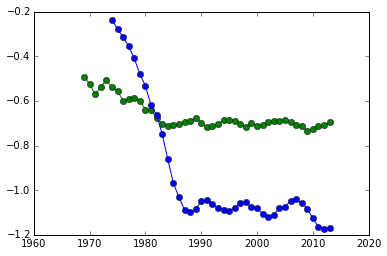

In [210]:
#windowed svr
save_for_test = 2

trans = StandardScaler()
y = trans.fit_transform(y)

svr_rbf = SVR(kernel='rbf', C=1e11, gamma=1e-10)
y_rbf = svr_rbf.fit(x[:-save_for_test], y[:-save_for_test]).predict(x)

score = svr_rbf.score(x,y)

y = trans.inverse_transform(y)
y_rbf = trans.inverse_transform(y_rbf)

print score
print len(y_rbf)
print y_rbf
print y

plt.plot(years_comb, values_comb, '-o', color='green')
plt.plot(years_comb[window:], y_rbf, '-o', color='blue')

#plt.ylim(-.5,.5)
plt.show()




-51.0529802918
40
[-0.53773434 -0.55837998 -0.59996271 -0.63461569 -0.62073274 -0.6094503
 -0.61077138 -0.65655664 -0.66248347 -0.68391442 -0.70109928 -0.71468361
 -0.70003841 -0.69578075 -0.68867986 -0.68601167 -0.67676697 -0.69408176
 -0.71603914 -0.71414764 -0.69444501 -0.67939096 -0.68190916 -0.68981297
 -0.70518825 -0.71615476 -0.69636827 -0.70223089 -0.70090382 -0.69573201
 -0.68023891 -0.68930231 -0.68896435 -0.69503387 -0.70528073 -0.71153717
 -0.72395087 -0.71966992 -0.70542641 -0.69521049]
[-0.53935988 -0.55570708 -0.59856131 -0.59325965 -0.58695398 -0.59894633
 -0.63912384 -0.63964725 -0.678188   -0.70151008 -0.71166347 -0.7087333
 -0.70501427 -0.69471964 -0.68965032 -0.67705588 -0.69694966 -0.71766431
 -0.71209264 -0.70265673 -0.68760897 -0.6854319  -0.69073039 -0.70501167
 -0.7190114  -0.69731701 -0.7147652  -0.706894   -0.6954318  -0.68807254
 -0.69183617 -0.68735352 -0.69645245 -0.70896564 -0.71342532 -0.73376221
 -0.72739083 -0.71402293 -0.70875649 -0.69514305]


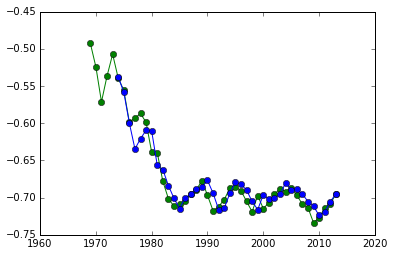

In [211]:
#windowed svr gridsearch  THIS ONE WORKS
save_for_test = 2

trans = StandardScaler()
y = trans.fit_transform(y)

parameters = {'gamma':[2**i for i in range(-30,30)], 'C':[2**i for i in range(-30,30)]}
parameters = {'C':[2**i for i in range(-30,30)]}
svr = SVR(kernel='linear')

r2_scorer = make_scorer(r2_score)
grid = GridSearchCV(svr, param_grid=parameters)
svr_grid = grid.fit(x[:-save_for_test], y[:-save_for_test]).best_estimator_
y_rbf = svr_grid.predict(x)
score = svr_rbf.score(x,y)

y = trans.inverse_transform(y)
y_rbf = trans.inverse_transform(y_rbf)

print score
print len(y_rbf)
print y_rbf
print y

plt.plot(years_comb, values_comb, '-o', color='green')
plt.plot(years_comb[window:], y_rbf, '-o', color='blue')

#plt.ylim(-.5,.5)
plt.show()



-0.0856638249403
45
[-0.59248424 -0.59375931 -0.5950359  -0.59631378 -0.59759271 -0.59887245
 -0.60015279 -0.60143347 -0.60271427 -0.60399496 -0.60527529 -0.60655504
 -0.60783397 -0.60911184 -0.61038843 -0.6116635  -0.61293682 -0.61420815
 -0.61547727 -0.61674395 -0.61800794 -0.61926904 -0.62052699 -0.62178159
 -0.6230326  -0.6242798  -0.62552297 -0.62676187 -0.6279963  -0.62922602
 -0.63045083 -0.6316705  -0.63288481 -0.63409356 -0.63529653 -0.63649351
 -0.6376843  -0.63886868 -0.64004644 -0.6412174  -0.64238134 -0.64353806
 -0.64468738 -0.64582909 -0.646963  ]
[-0.53935987955810183, -0.55570708178909278, -0.5985613135453367, -0.59325965047925822, -0.58695397559720797, -0.5989463321930717, -0.63912384276326351, -0.63964725313630955, -0.67818800486412489, -0.70151007544148247, -0.71166346862284735, -0.70873330160119719, -0.7050142685256644, -0.69471964067504222, -0.68965032370504942, -0.67705587940421941, -0.69694965628643146, -0.71766431487463289, -0.71209263566510672, -0.702656725490

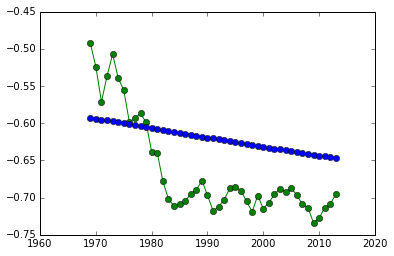

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': array([  3.12500e-02,   1.25000e-01,   5.00000e-01,   2.00000e+00,
         8.00000e+00,   3.20000e+01,   1.28000e+02,   5.12000e+02,
         2.04800e+03,   8.19200e+03,   3.27680e+04,   1.31072e+05]), 'gamma': array([  3.05176e-05,   1.22070e-04,   4.88281e-04,   1.95312e-03,
         7.81250e-03,   3.12500e-02,   1.25000e-01,   5.00000e-01,
         2.00000e+00,   8.00000e+00,   3.20000e+01])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)


In [197]:
# plain svr gridsearch
save_for_test = 2
#for cexp in range(-10,10):
svr = SVR(kernel='rbf')


C_range = 2. ** np.array([-5,-3,-1, 1, 3, 5, 7, 9, 11, 13, 15 ,17])
gamma_range = 2. ** np.array([-15 ,-13, -11, -9, -7, -5, -3, -1, 1, 3, 5])

param_grid = {'gamma':gamma_range, 'C':C_range}

clf = GridSearchCV(svr, param_grid=param_grid, n_jobs=-1, cv=10)
svr_grid = clf.fit(np.matrix(years_comb[:-save_for_test]).T, values_comb[:-save_for_test])
y_rbf = clf.predict(np.matrix(years_comb).T)
score = clf.score(np.matrix(years_comb).T,values_comb)

print score
print len(y_rbf)
print y_rbf
print y

plt.plot(years_comb, values_comb, '-o', color='green')
plt.plot(years_comb, y_rbf, '-o', color='blue')

#plt.ylim(-.5,.5)
plt.show()


print clf

[-0.59294376 -0.59438657 -0.5986493  -0.60362588 -0.60774287 -0.61059618
 -0.6124616  -0.61366356 -0.61438922 -0.61477043 -0.61493688 -0.61499615
 -0.61501335 -0.61501793 -0.61502176 -0.61503493 -0.6150798  -0.61520337
 -0.61547374 -0.61593573 -0.61653185 -0.61706616 -0.61730276 -0.61716318
 -0.61684102 -0.61669882 -0.61701074 -0.6177375  -0.61850053 -0.61881553
 -0.61844344 -0.61755854 -0.61658582 -0.61591831 -0.61583074 -0.61663037
 -0.61875766 -0.62249819 -0.62734145 -0.63165148 -0.63340066 -0.63165132
 -0.6273403  -0.62249191 -0.6187295 ]
[-0.49248428 -0.52434336 -0.57131721 -0.53648898 -0.50728339 -0.53935988
 -0.55570708 -0.59856131 -0.59325965 -0.58695398 -0.59894633 -0.63912384
 -0.63964725 -0.678188   -0.70151008 -0.71166347 -0.7087333  -0.70501427
 -0.69471964 -0.68965032 -0.67705588 -0.69694966 -0.71766431 -0.71209264
 -0.70265673 -0.68760897 -0.6854319  -0.69073039 -0.70501167 -0.7190114
 -0.69731701 -0.7147652  -0.706894   -0.6954318  -0.68807254 -0.69183617
 -0.68735352 -

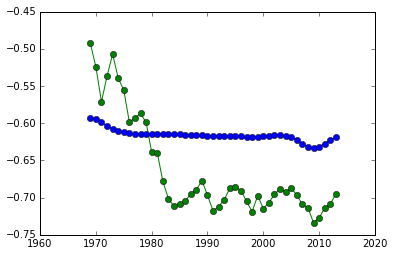

In [189]:
# plain svr
save_for_test = 2
#for cexp in range(-10,10):
svr_rbf = SVR(kernel='rbf', C=1e5, gamma=1e-1)

values_pred = svr_rbf.fit(np.matrix(years_comb[:-save_for_test]).T, values_comb[:-save_for_test]).predict(np.matrix(years_comb).T)

score = svr_rbf.score(np.matrix(years_comb[:-save_for_test]).T, values_comb[:-save_for_test])

print values_pred
print values_comb
print score

plt.plot(years_comb, values_comb, '-o', color='green')
plt.plot(years_comb, values_pred, '-o', color='blue')

#plt.ylim(-.5,.5)
plt.show()

[-0.70519284 -0.70519284 -0.70519284 -0.70519284 -0.70519284 -0.70519284
 -0.70519284 -0.70519284 -0.70519284 -0.70519284 -0.70519284 -0.70519284
 -0.70519284]
[-0.706894   -0.6954318  -0.68807254 -0.69183617 -0.68735352 -0.69645245
 -0.70896564 -0.71342532 -0.73376221 -0.72739083 -0.71402293 -0.70875649
 -0.69514305]
0.0


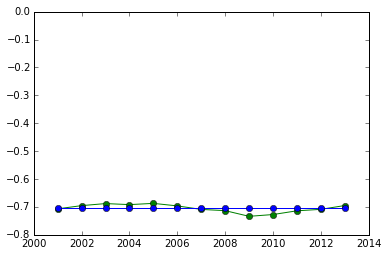

In [198]:
# Create linear regression object
regr = linear_model.LinearRegression()
las_reg = linear_model.Lasso(alpha = .5)

# Train the model using the training sets
values_pred = las_reg.fit(np.matrix(years).T, values).predict(np.matrix(years).T)

score = las_reg.score(np.matrix(years).T, values)

print values_pred
print values
print score

plt.plot(years, values, '-o', color='green')
plt.plot(years, values_pred, '-o', color='blue')

plt.ylim(-.8,0)
plt.show()

In [209]:
print values

trans = StandardScaler()
trans_values = trans.fit_transform(values)

trans.inverse_transform(trans_values)

[-0.706894   -0.6954318  -0.68807254 -0.69183617 -0.68735352 -0.69645245
 -0.70896564 -0.71342532 -0.73376221 -0.72739083 -0.71402293 -0.70875649
 -0.69514305]
[-0.12153601  0.6973615   1.22313108  0.95424481  1.27450014  0.62444263
 -0.26954087 -0.58815576 -2.04109039 -1.58589762 -0.6308507  -0.25459901
  0.71799021]


array([-0.706894  , -0.6954318 , -0.68807254, -0.69183617, -0.68735352,
       -0.69645245, -0.70896564, -0.71342532, -0.73376221, -0.72739083,
       -0.71402293, -0.70875649, -0.69514305])